In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mfglib.alg.greedy_policy_given_mean_field import Greedy_Policy
from mfglib.mean_field import mean_field
from mfglib.env import Environment
from mfglib.alg.utils import _ensure_free_tensor
import torch

d:\Program Files\anaconda3\envs\mfg\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
instance = Environment.beach_bar(n=3, bar_loc=1, T=2)
pi = _ensure_free_tensor("uniform", instance)
L = mean_field(instance, pi)
print(instance.T)
print(L.shape)
shape_record = L.shape

torch.Size([3, 3])
2
torch.Size([3, 3, 3])


Step sizes (h):
[1.00000000e-06 1.83298071e-06 3.35981829e-06 6.15848211e-06
 1.12883789e-05 2.06913808e-05 3.79269019e-05 6.95192796e-05
 1.27427499e-04 2.33572147e-04 4.28133240e-04 7.84759970e-04
 1.43844989e-03 2.63665090e-03 4.83293024e-03 8.85866790e-03
 1.62377674e-02 2.97635144e-02 5.45559478e-02 1.00000000e-01]
Finite difference approximations w = (F_rep(x^k + h*u) - y^k)/h:
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0

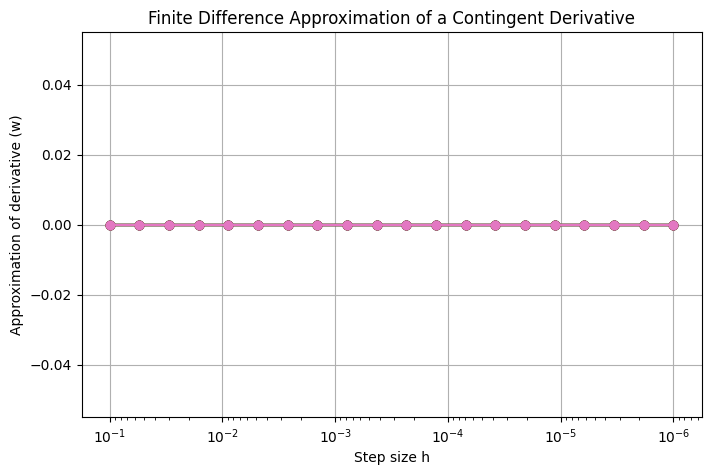

In [14]:
def F_rep(L, env_instance):
    #L = L.reshape(shape_record)
    pi_br = Greedy_Policy(env_instance, L)
    mu_final = torch.sum(L, axis=2)[-1]
    mu_final /= torch.sum(mu_final)
    env_instance.update_initial_distribution(mu_final)
    L_br = mean_field(env_instance, pi_br)
    return L_br

L_k = mean_field(instance, pi)
y_k = F_rep(L_k, instance)
u = L_k - L_k.mean(dim=0, keepdim=True)

h_values = np.logspace(-6, -1, 20)

w_approximations = np.array([(F_rep(L_k + h * u, instance) - y_k) / h for h in h_values])

# Output the numerical approximations.
print("Step sizes (h):")
print(h_values)
print("Finite difference approximations w = (F_rep(x^k + h*u) - y^k)/h:")
print(w_approximations)

# Plot the approximations to inspect convergence as h -> 0.
plt.figure(figsize=(8, 5))
plt.semilogx(h_values, w_approximations.reshape(20, 27), 'o-', label='Finite difference quotient')
plt.xlabel("Step size h")
plt.ylabel("Approximation of derivative (w)")
plt.title("Finite Difference Approximation of a Contingent Derivative")
#plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()  # Optional: display smaller h values on the right
plt.show()


Step sizes (h):
[1.00000000e-06 1.83298071e-06 3.35981829e-06 6.15848211e-06
 1.12883789e-05 2.06913808e-05 3.79269019e-05 6.95192796e-05
 1.27427499e-04 2.33572147e-04 4.28133240e-04 7.84759970e-04
 1.43844989e-03 2.63665090e-03 4.83293024e-03 8.85866790e-03
 1.62377674e-02 2.97635144e-02 5.45559478e-02 1.00000000e-01]
Finite difference approximations w = (F_rep(x^k + h*u) - y^k)/h:
[0.40000001 0.40000002 0.40000003 0.40000006 0.40000011 0.40000021
 0.40000038 0.4000007  0.40000127 0.40000234 0.40000428 0.40000785
 0.40001438 0.40002637 0.40004833 0.40008859 0.40016238 0.40029764
 0.40054556 0.401     ]


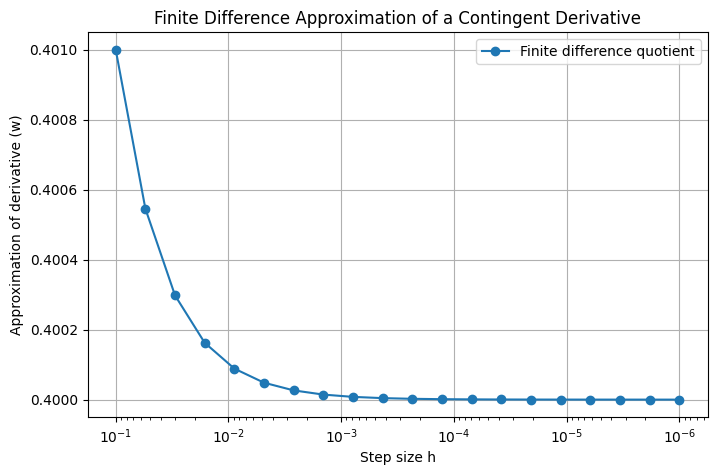

In [2]:

# Representative output function for the set-valued map F.
# This function should be modified to reflect your specific F.
def F_rep(x):
    # For demonstration, we use a simple nonlinear function.
    # In practice, F may be set-valued and this function picks one representative element.
    return x**2  # Example: F(x) = x^2

# Current iterate (x^k, y^k) with y^k = F_rep(x^k)
x_k = 2.0
y_k = F_rep(x_k)

# Direction in which we want to approximate the derivative.
# In this example, u is a scalar (for vector cases, u would be a vector).
u = 0.1

# Choose a sequence of small step sizes h.
# We'll use logarithmically spaced points between 10^-6 and 10^-1.
h_values = np.logspace(-6, -1, 20)

# Compute the finite difference quotient for each h.
# For each step size, evaluate F_rep(x^k + h * u), then compute the quotient.
w_approximations = np.array([(F_rep(x_k + h * u) - y_k) / h for h in h_values])

# Output the numerical approximations.
print("Step sizes (h):")
print(h_values)
print("Finite difference approximations w = (F_rep(x^k + h*u) - y^k)/h:")
print(w_approximations)

# Plot the approximations to inspect convergence as h -> 0.
plt.figure(figsize=(8, 5))
plt.semilogx(h_values, w_approximations, 'o-', label='Finite difference quotient')
plt.xlabel("Step size h")
plt.ylabel("Approximation of derivative (w)")
plt.title("Finite Difference Approximation of a Contingent Derivative")
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()  # Optional: display smaller h values on the right
plt.show()
